In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [79]:
train = pd.read_csv('data/train.csv', index_col='ID')
test = pd.read_csv('data/test.csv', index_col='ID')

# 이상치, 결측치 제거

In [80]:
# 공백문자가 포함된 컬럼 warehouse_block 수정
train = train.rename(columns = {'Warehouse_block ': 'Warehouse_block'})
test = test.rename(columns = {'Warehouse_block ': 'Warehouse_block'})

In [81]:
train['Mode_of_Shipment']=train['Mode_of_Shipment'].replace(' Shipzk', 'Ship')
train['Mode_of_Shipment']=train['Mode_of_Shipment'].replace(' Flightzk', 'Flight')
train['Mode_of_Shipment']=train['Mode_of_Shipment'].replace(' Roadzk', 'Road')
train['Mode_of_Shipment']=train['Mode_of_Shipment'].replace(' Ship', 'Ship')
train['Mode_of_Shipment']=train['Mode_of_Shipment'].replace(' Flight', 'Flight')
train['Mode_of_Shipment']=train['Mode_of_Shipment'].replace(' Road', 'Road')

In [82]:
test['Mode_of_Shipment']=test['Mode_of_Shipment'].replace(' Shipzk', 'Ship')
test['Mode_of_Shipment']=test['Mode_of_Shipment'].replace(' Flightzk', 'Flight')
test['Mode_of_Shipment']=test['Mode_of_Shipment'].replace(' Roadzk', 'Road')
test['Mode_of_Shipment']=test['Mode_of_Shipment'].replace(' Ship', 'Ship')
test['Mode_of_Shipment']=test['Mode_of_Shipment'].replace(' Flight', 'Flight')
test['Mode_of_Shipment']=test['Mode_of_Shipment'].replace(' Road', 'Road')

In [83]:
train['Customer_rating']=train['Customer_rating'].replace(99, 3)

In [84]:
test['Customer_rating']=test['Customer_rating'].replace(99, 3)

In [85]:
train['Product_importance'] = train['Product_importance'].replace('mediumm', 'medium')
train['Product_importance'] = train['Product_importance'].replace('loww', 'low')
train['Product_importance'] = train['Product_importance'].replace('highh', 'high')

In [86]:
test['Product_importance'] = test['Product_importance'].replace('mediumm', 'medium')
test['Product_importance'] = test['Product_importance'].replace('loww', 'low')
test['Product_importance'] = test['Product_importance'].replace('highh', 'high')

In [87]:
# 그대로 사용

In [88]:
# 최빈값에 ? 대입
train['Product_importance'] = train['Product_importance'].replace('?','low')
test['Product_importance'] = test['Product_importance'].replace('?','low')

In [89]:
# customer_care_calls => 1576

In [90]:
train['Customer_care_calls']=train['Customer_care_calls'].fillna(0)
test['Customer_care_calls']=test['Customer_care_calls'].fillna(0)

In [91]:
train['Customer_care_calls']=train['Customer_care_calls'].astype('int64')
test['Customer_care_calls']=test['Customer_care_calls'].astype('int64')

In [92]:
# prior_purchases => 950 

In [93]:
train['Prior_purchases']=train['Prior_purchases'].fillna(0)
test['Prior_purchases']=test['Prior_purchases'].fillna(0)

In [94]:
#고유한 값으로 사용?

In [95]:
mask = train['Weight_in_gms'].isin(['?'])
del_wei_question=train[~mask]

In [96]:
del_wei_question['Weight_in_gms']=del_wei_question['Weight_in_gms'].astype('int64')

<ipython-input-96-9102d6bf3727>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del_wei_question['Weight_in_gms']=del_wei_question['Weight_in_gms'].astype('int64')


In [97]:
pivot = del_wei_question.pivot_table(values='Weight_in_gms',
                         index=['Customer_care_calls'],
                         aggfunc='mean'
                         )
pivot['Weight_in_gms']=pivot['Weight_in_gms'].astype('int64')

In [98]:
train['Weight_in_gms']=train['Weight_in_gms'].replace('?', '0')

In [99]:
test['Weight_in_gms']=test['Weight_in_gms'].replace('?', '0')

In [100]:
train['Weight_in_gms']=train['Weight_in_gms'].astype('int64')

In [101]:
test['Weight_in_gms']=test['Weight_in_gms'].astype('int64')

In [102]:
def fill_wei(data):
    if data['Weight_in_gms']==0:
        return pivot.loc[data['Customer_care_calls']]
    else:
        return data['Weight_in_gms']

In [103]:
train['Weight_in_gms'] = train.apply(fill_wei, axis=1).astype('int64')

In [104]:
test['Weight_in_gms'] = test.apply(fill_wei, axis=1).astype('int64')

In [105]:
# Discount_offered => 3531
# 0 컬럼삭제

In [106]:
train['Cost_of_the_Product']=train['Cost_of_the_Product'].replace(9999,216)

In [107]:
test['Cost_of_the_Product']=test['Cost_of_the_Product'].replace(9999,216)

In [108]:
del train['Discount_offered']
del test['Discount_offered']`

In [176]:
train['Gender'].unique()

array(['M', 'F'], dtype=object)

# 시각화

# 전처리

## 원핫 인코딩


In [109]:
# 임 포 트
from sklearn.preprocessing import OneHotEncoder

In [110]:
# dummies 더미 컴럼을 만들어줌 원래 컴럼속의 유니크 값 만큼 나옴
x_one_hot=pd.get_dummies(train)
x_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_care_calls        6999 non-null   int64  
 1   Customer_rating            6999 non-null   int64  
 2   Cost_of_the_Product        6999 non-null   int64  
 3   Prior_purchases            6999 non-null   float64
 4   Weight_in_gms              6999 non-null   int64  
 5   Reached.on.Time_Y.N        6999 non-null   int64  
 6   Warehouse_block_A          6999 non-null   uint8  
 7   Warehouse_block_B          6999 non-null   uint8  
 8   Warehouse_block_C          6999 non-null   uint8  
 9   Warehouse_block_D          6999 non-null   uint8  
 10  Warehouse_block_F          6999 non-null   uint8  
 11  Mode_of_Shipment_?         6999 non-null   uint8  
 12  Mode_of_Shipment_Flight    6999 non-null   uint8  
 13  Mode_of_Shipment_Road      6999 non-null   uint8

In [111]:
# dummies 더미 컴럼을 만들어줌 원래 컴럼속의 유니크 값 만큼 나옴
x_one_hot1=pd.get_dummies(test)
x_one_hot1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 7000 to 10999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_care_calls        4000 non-null   int64  
 1   Customer_rating            4000 non-null   int64  
 2   Cost_of_the_Product        4000 non-null   int64  
 3   Prior_purchases            4000 non-null   float64
 4   Weight_in_gms              4000 non-null   int64  
 5   Warehouse_block_A          4000 non-null   uint8  
 6   Warehouse_block_B          4000 non-null   uint8  
 7   Warehouse_block_C          4000 non-null   uint8  
 8   Warehouse_block_D          4000 non-null   uint8  
 9   Warehouse_block_F          4000 non-null   uint8  
 10  Mode_of_Shipment_?         4000 non-null   uint8  
 11  Mode_of_Shipment_Flight    4000 non-null   uint8  
 12  Mode_of_Shipment_Road      4000 non-null   uint8  
 13  Mode_of_Shipment_Ship      4000 non-null   u

In [112]:
# 전체 행 보기
pd.set_option('display.max_rows', None)

In [113]:
# 초기화
pd.reset_option('display')

# Cost_of_the_Product 그룹화!

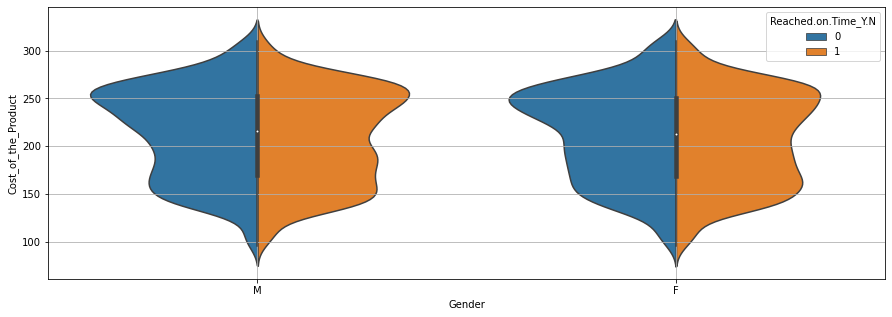

In [114]:
plt.figure(figsize=(15,5))
sns.violinplot(data= train,
              x='Gender',
              y='Cost_of_the_Product',
              hue='Reached.on.Time_Y.N',
            split=True)
plt.grid()

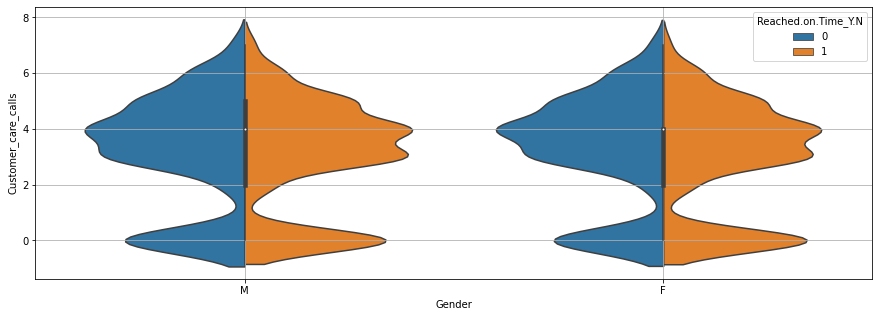

In [115]:
plt.figure(figsize=(15,5))
sns.violinplot(data= train,
              x='Gender',
              y='Customer_care_calls',
              hue='Reached.on.Time_Y.N',
            split=True)
plt.grid()

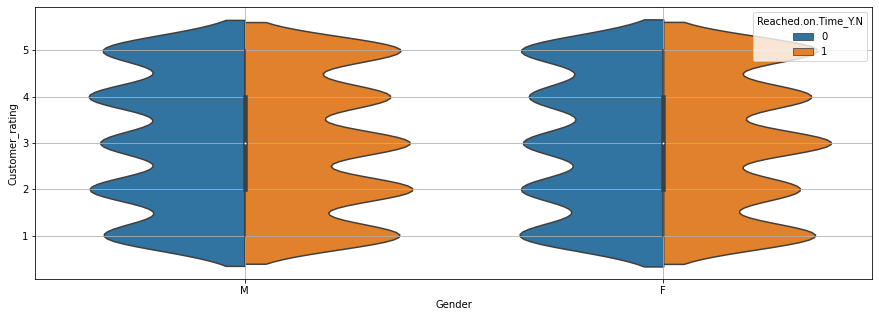

In [116]:
plt.figure(figsize=(15,5))
sns.violinplot(data= train,
              x='Gender',
              y='Customer_rating',
              hue='Reached.on.Time_Y.N',
            split=True)
plt.grid()

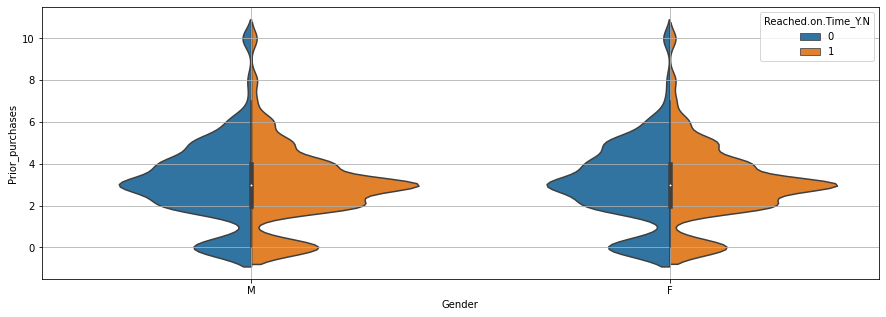

In [117]:
plt.figure(figsize=(15,5))
sns.violinplot(data= train,
              x='Gender',
              y='Customer_care_calls',
              hue='Reached.on.Time_Y.N',
            split=True)
plt.grid()

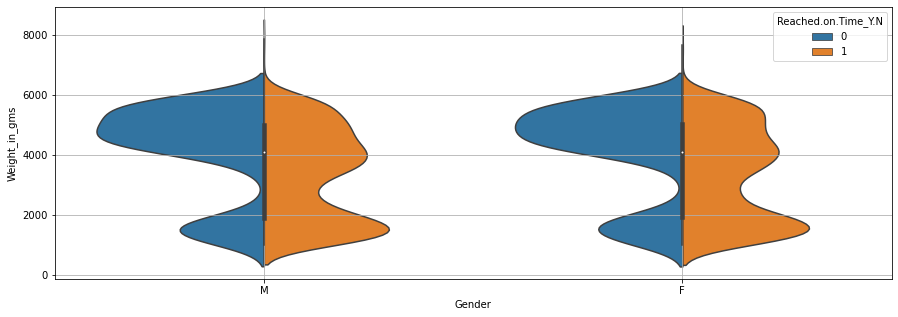

In [118]:
plt.figure(figsize=(15,5))
#plt.ylim(4000,5000)
sns.violinplot(data= train,
              x='Gender',
              y='Weight_in_gms',
              hue='Reached.on.Time_Y.N',
            split=True)
plt.grid()



In [119]:
#전체 가족의 숫자르 범주화하여 Family_Group 컬럼을 새로 생성
#bins 범주의 경계 
#labels 범주의 명칭 지정
bin_size=[0,150,250,10000]
labels_size=['Alone','Small','Large']
x_one_hot['Product']= pd.cut(train['Cost_of_the_Product'],bins=bin_size, labels= labels_size)
x_one_hot1['Product']= pd.cut(test['Cost_of_the_Product'],bins=bin_size, labels=labels_size )

In [120]:
x_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Customer_care_calls        6999 non-null   int64   
 1   Customer_rating            6999 non-null   int64   
 2   Cost_of_the_Product        6999 non-null   int64   
 3   Prior_purchases            6999 non-null   float64 
 4   Weight_in_gms              6999 non-null   int64   
 5   Reached.on.Time_Y.N        6999 non-null   int64   
 6   Warehouse_block_A          6999 non-null   uint8   
 7   Warehouse_block_B          6999 non-null   uint8   
 8   Warehouse_block_C          6999 non-null   uint8   
 9   Warehouse_block_D          6999 non-null   uint8   
 10  Warehouse_block_F          6999 non-null   uint8   
 11  Mode_of_Shipment_?         6999 non-null   uint8   
 12  Mode_of_Shipment_Flight    6999 non-null   uint8   
 13  Mode_of_Shipment_Road      6999 n

In [174]:
x_one_hot['Mode_of_Shipment_Flight']

ID
1       0
2       1
3       0
4       0
5       1
       ..
6995    0
6996    0
6997    0
6998    0
6999    0
Name: Mode_of_Shipment_Flight, Length: 6999, dtype: uint8

In [121]:
x_one_hot1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 7000 to 10999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Customer_care_calls        4000 non-null   int64   
 1   Customer_rating            4000 non-null   int64   
 2   Cost_of_the_Product        4000 non-null   int64   
 3   Prior_purchases            4000 non-null   float64 
 4   Weight_in_gms              4000 non-null   int64   
 5   Warehouse_block_A          4000 non-null   uint8   
 6   Warehouse_block_B          4000 non-null   uint8   
 7   Warehouse_block_C          4000 non-null   uint8   
 8   Warehouse_block_D          4000 non-null   uint8   
 9   Warehouse_block_F          4000 non-null   uint8   
 10  Mode_of_Shipment_?         4000 non-null   uint8   
 11  Mode_of_Shipment_Flight    4000 non-null   uint8   
 12  Mode_of_Shipment_Road      4000 non-null   uint8   
 13  Mode_of_Shipment_Ship      40

In [122]:
#전체 가족의 숫자르 범주화하여 Family_Group 컬럼을 새로 생성
#bins 범주의 경계 
#labels 범주의 명칭 지정
bin_size=[0,4200,10000]
labels_size=['Small','Large']
x_one_hot['gms']= pd.cut(train['Weight_in_gms'],bins=bin_size, labels= labels_size)
x_one_hot1['gms']= pd.cut(test['Weight_in_gms'],bins=bin_size, labels= labels_size )

In [123]:
x_one_hot.drop('Weight_in_gms', axis=1,inplace=True)
x_one_hot.drop('Cost_of_the_Product', axis=1,inplace=True)
x_one_hot1.drop('Weight_in_gms', axis=1,inplace=True)
x_one_hot1.drop('Cost_of_the_Product', axis=1,inplace=True)

In [124]:
x_one_hot1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 7000 to 10999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Customer_care_calls        4000 non-null   int64   
 1   Customer_rating            4000 non-null   int64   
 2   Prior_purchases            4000 non-null   float64 
 3   Warehouse_block_A          4000 non-null   uint8   
 4   Warehouse_block_B          4000 non-null   uint8   
 5   Warehouse_block_C          4000 non-null   uint8   
 6   Warehouse_block_D          4000 non-null   uint8   
 7   Warehouse_block_F          4000 non-null   uint8   
 8   Mode_of_Shipment_?         4000 non-null   uint8   
 9   Mode_of_Shipment_Flight    4000 non-null   uint8   
 10  Mode_of_Shipment_Road      4000 non-null   uint8   
 11  Mode_of_Shipment_Ship      4000 non-null   uint8   
 12  Product_importance_high    4000 non-null   uint8   
 13  Product_importance_low     40

In [125]:
x_one_hot["Time_Y.N"]=x_one_hot['Reached.on.Time_Y.N']

In [126]:
x_one_hot.drop('Reached.on.Time_Y.N', axis=1,inplace=True)

In [127]:
x_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Customer_care_calls        6999 non-null   int64   
 1   Customer_rating            6999 non-null   int64   
 2   Prior_purchases            6999 non-null   float64 
 3   Warehouse_block_A          6999 non-null   uint8   
 4   Warehouse_block_B          6999 non-null   uint8   
 5   Warehouse_block_C          6999 non-null   uint8   
 6   Warehouse_block_D          6999 non-null   uint8   
 7   Warehouse_block_F          6999 non-null   uint8   
 8   Mode_of_Shipment_?         6999 non-null   uint8   
 9   Mode_of_Shipment_Flight    6999 non-null   uint8   
 10  Mode_of_Shipment_Road      6999 non-null   uint8   
 11  Mode_of_Shipment_Ship      6999 non-null   uint8   
 12  Product_importance_high    6999 non-null   uint8   
 13  Product_importance_low     6999 n

In [128]:
# dummies 더미 컴럼을 만들어줌 원래 컴럼속의 유니크 값 만큼 나옴
x_one_hot=pd.get_dummies(x_one_hot)
x_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_care_calls        6999 non-null   int64  
 1   Customer_rating            6999 non-null   int64  
 2   Prior_purchases            6999 non-null   float64
 3   Warehouse_block_A          6999 non-null   uint8  
 4   Warehouse_block_B          6999 non-null   uint8  
 5   Warehouse_block_C          6999 non-null   uint8  
 6   Warehouse_block_D          6999 non-null   uint8  
 7   Warehouse_block_F          6999 non-null   uint8  
 8   Mode_of_Shipment_?         6999 non-null   uint8  
 9   Mode_of_Shipment_Flight    6999 non-null   uint8  
 10  Mode_of_Shipment_Road      6999 non-null   uint8  
 11  Mode_of_Shipment_Ship      6999 non-null   uint8  
 12  Product_importance_high    6999 non-null   uint8  
 13  Product_importance_low     6999 non-null   uint8

In [129]:
# dummies 더미 컴럼을 만들어줌 원래 컴럼속의 유니크 값 만큼 나옴
x_one_hot1=pd.get_dummies(x_one_hot1)
x_one_hot1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 7000 to 10999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_care_calls        4000 non-null   int64  
 1   Customer_rating            4000 non-null   int64  
 2   Prior_purchases            4000 non-null   float64
 3   Warehouse_block_A          4000 non-null   uint8  
 4   Warehouse_block_B          4000 non-null   uint8  
 5   Warehouse_block_C          4000 non-null   uint8  
 6   Warehouse_block_D          4000 non-null   uint8  
 7   Warehouse_block_F          4000 non-null   uint8  
 8   Mode_of_Shipment_?         4000 non-null   uint8  
 9   Mode_of_Shipment_Flight    4000 non-null   uint8  
 10  Mode_of_Shipment_Road      4000 non-null   uint8  
 11  Mode_of_Shipment_Ship      4000 non-null   uint8  
 12  Product_importance_high    4000 non-null   uint8  
 13  Product_importance_low     4000 non-null   u

In [130]:
x_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_care_calls        6999 non-null   int64  
 1   Customer_rating            6999 non-null   int64  
 2   Prior_purchases            6999 non-null   float64
 3   Warehouse_block_A          6999 non-null   uint8  
 4   Warehouse_block_B          6999 non-null   uint8  
 5   Warehouse_block_C          6999 non-null   uint8  
 6   Warehouse_block_D          6999 non-null   uint8  
 7   Warehouse_block_F          6999 non-null   uint8  
 8   Mode_of_Shipment_?         6999 non-null   uint8  
 9   Mode_of_Shipment_Flight    6999 non-null   uint8  
 10  Mode_of_Shipment_Road      6999 non-null   uint8  
 11  Mode_of_Shipment_Ship      6999 non-null   uint8  
 12  Product_importance_high    6999 non-null   uint8  
 13  Product_importance_low     6999 non-null   uint8

In [131]:
x_one_hot1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 7000 to 10999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_care_calls        4000 non-null   int64  
 1   Customer_rating            4000 non-null   int64  
 2   Prior_purchases            4000 non-null   float64
 3   Warehouse_block_A          4000 non-null   uint8  
 4   Warehouse_block_B          4000 non-null   uint8  
 5   Warehouse_block_C          4000 non-null   uint8  
 6   Warehouse_block_D          4000 non-null   uint8  
 7   Warehouse_block_F          4000 non-null   uint8  
 8   Mode_of_Shipment_?         4000 non-null   uint8  
 9   Mode_of_Shipment_Flight    4000 non-null   uint8  
 10  Mode_of_Shipment_Road      4000 non-null   uint8  
 11  Mode_of_Shipment_Ship      4000 non-null   uint8  
 12  Product_importance_high    4000 non-null   uint8  
 13  Product_importance_low     4000 non-null   u

In [132]:
x_one_hot["Time_Y.N2"]=x_one_hot["Time_Y.N"]

In [133]:
x_one_hot.drop('Time_Y.N', axis=1, inplace=True)

In [134]:
x_one_hot["Time_Y.N"]=x_one_hot["Time_Y.N2"]

In [135]:
x_one_hot.drop('Time_Y.N2', axis=1, inplace=True)

In [136]:
x_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_care_calls        6999 non-null   int64  
 1   Customer_rating            6999 non-null   int64  
 2   Prior_purchases            6999 non-null   float64
 3   Warehouse_block_A          6999 non-null   uint8  
 4   Warehouse_block_B          6999 non-null   uint8  
 5   Warehouse_block_C          6999 non-null   uint8  
 6   Warehouse_block_D          6999 non-null   uint8  
 7   Warehouse_block_F          6999 non-null   uint8  
 8   Mode_of_Shipment_?         6999 non-null   uint8  
 9   Mode_of_Shipment_Flight    6999 non-null   uint8  
 10  Mode_of_Shipment_Road      6999 non-null   uint8  
 11  Mode_of_Shipment_Ship      6999 non-null   uint8  
 12  Product_importance_high    6999 non-null   uint8  
 13  Product_importance_low     6999 non-null   uint8

In [137]:
x_one_hot1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 7000 to 10999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_care_calls        4000 non-null   int64  
 1   Customer_rating            4000 non-null   int64  
 2   Prior_purchases            4000 non-null   float64
 3   Warehouse_block_A          4000 non-null   uint8  
 4   Warehouse_block_B          4000 non-null   uint8  
 5   Warehouse_block_C          4000 non-null   uint8  
 6   Warehouse_block_D          4000 non-null   uint8  
 7   Warehouse_block_F          4000 non-null   uint8  
 8   Mode_of_Shipment_?         4000 non-null   uint8  
 9   Mode_of_Shipment_Flight    4000 non-null   uint8  
 10  Mode_of_Shipment_Road      4000 non-null   uint8  
 11  Mode_of_Shipment_Ship      4000 non-null   uint8  
 12  Product_importance_high    4000 non-null   uint8  
 13  Product_importance_low     4000 non-null   u

In [138]:
x_one_hot.corr()

,Customer_care_calls,Customer_rating,Prior_purchases,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_?,Mode_of_Shipment_Flight,...,Product_importance_low,Product_importance_medium,Gender_F,Gender_M,Product_Alone,Product_Small,Product_Large,gms_Small,gms_Large,Time_Y.N
Customer_care_calls,1.000000,0.009423,0.059339,0.010856,-0.018672,0.003755,-0.001439,0.004297,-0.020663,0.013443,...,0.028171,-0.009467,-0.004823,0.004823,-0.048513,-0.085401,0.134697,0.051902,-0.051902,-0.061375
Customer_rating,0.009423,1.000000,0.013079,-0.004241,0.002265,-0.000973,0.009332,-0.005045,0.012354,-0.000894,...,0.000970,-0.004696,0.006883,-0.006883,0.009259,-0.014155,0.008533,-0.006921,0.006921,0.001127
Prior_purchases,0.059339,0.013079,1.000000,-0.000342,-0.004824,0.006172,0.010176,-0.008899,0.012909,0.020216,...,-0.007424,0.003067,0.009719,-0.009719,-0.020986,-0.054362,0.077853,0.079211,-0.079211,-0.032579
Warehouse_block_A,0.010856,-0.004241,-0.000342,1.000000,-0.200306,-0.202576,-0.200926,-0.315204,0.000738,0.002744,...,0.011967,-0.014973,0.001984,-0.001984,0.032928,-0.004235,-0.021491,-0.001676,0.001676,-0.011003
Warehouse_block_B,-0.018672,0.002265,-0.004824,-0.200306,1.000000,-0.201330,-0.199691,-0.313267,-0.010132,-0.007195,...,-0.016478,0.023877,-0.005700,0.005700,-0.026127,0.017242,0.001444,0.003268,-0.003268,0.008610
Warehouse_block_C,0.003755,-0.000973,0.006172,-0.202576,-0.201330,1.000000,-0.201953,-0.316816,-0.008652,-0.003143,...,0.002079,-0.002794,-0.001062,0.001062,-0.014981,-0.012106,0.025555,-0.008823,0.008823,0.007706
Warehouse_block_D,-0.001439,0.009332,0.010176,-0.200926,-0.199691,-0.201953,1.000000,-0.314236,-0.002127,-0.000599,...,-0.006442,0.003250,0.018075,-0.018075,0.004015,-0.021792,0.021301,0.015390,-0.015390,0.018296
Warehouse_block_F,0.004297,-0.005045,-0.008899,-0.315204,-0.313267,-0.316816,-0.314236,1.000000,0.016013,0.006494,...,0.006980,-0.007346,-0.010550,0.010550,0.003271,0.016651,-0.021329,-0.006423,0.006423,-0.018720
Mode_of_Shipment_?,-0.020663,0.012354,0.012909,0.000738,-0.010132,-0.008652,-0.002127,0.016013,1.000000,-0.099119,...,-0.008188,0.003892,-0.007625,0.007625,0.002106,0.006133,-0.008575,-0.038141,0.038141,-0.029549
Mode_of_Shipment_Flight,0.013443,-0.000894,0.020216,0.002744,-0.007195,-0.003143,-0.000599,0.006494,-0.099119,1.000000,...,-0.008401,0.003045,-0.017344,0.017344,0.000487,0.009264,-0.010804,0.005339,-0.005339,0.005365


In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  6999 non-null   int64  
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6999 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Weight_in_gms        6999 non-null   int64  
 9   Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 921.5+ KB


In [140]:
pdf2 = pd.pivot_table(train,                # 피벗할 데이터프레임
                     index = 'Customer_rating',    # 행 위치에 들어갈 열
                     values = 'Reached.on.Time_Y.N',     # 데이터로 사용할 열
                     aggfunc = ['mean', 'sum'])   # 데이터 집계함수
pdf2

,mean,sum
,Reached.on.Time_Y.N,Reached.on.Time_Y.N
Customer_rating,,
1,0.594536,827
2,0.583274,816
3,0.615967,895
4,0.580693,788
5,0.597570,836


In [141]:
pdf2 = pd.pivot_table(train,                # 피벗할 데이터프레임
                     index = 'Customer_care_calls',    # 행 위치에 들어갈 열
                     values = 'Reached.on.Time_Y.N',     # 데이터로 사용할 열
                     aggfunc = ['mean', 'sum'])   # 데이터 집계함수
pdf2

,mean,sum
,Reached.on.Time_Y.N,Reached.on.Time_Y.N
Customer_care_calls,,
0,0.626269,987
2,0.658537,189
3,0.614198,995
4,0.582005,1022
5,0.576286,661
6,0.506048,251
7,0.487179,57


In [142]:
pdf2 = pd.pivot_table(train,                # 피벗할 데이터프레임
                     index = 'Prior_purchases',    # 행 위치에 들어갈 열
                     values = 'Reached.on.Time_Y.N',     # 데이터로 사용할 열
                     aggfunc = ['mean', 'sum'])   # 데이터 집계함수
pdf2

,mean,sum
,Reached.on.Time_Y.N,Reached.on.Time_Y.N
Prior_purchases,,
0.0,0.569474,541
2.0,0.626142,891
3.0,0.642004,1397
4.0,0.561102,652
5.0,0.492517,362
6.0,0.548387,170
7.0,0.700000,49
8.0,0.694444,50


# train, test 데이터 분류

In [143]:
X_train = x_one_hot.loc[:,:'gms_Large']
y_train = x_one_hot['Time_Y.N']
X_test = x_one_hot1

In [144]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_care_calls        6999 non-null   int64  
 1   Customer_rating            6999 non-null   int64  
 2   Prior_purchases            6999 non-null   float64
 3   Warehouse_block_A          6999 non-null   uint8  
 4   Warehouse_block_B          6999 non-null   uint8  
 5   Warehouse_block_C          6999 non-null   uint8  
 6   Warehouse_block_D          6999 non-null   uint8  
 7   Warehouse_block_F          6999 non-null   uint8  
 8   Mode_of_Shipment_?         6999 non-null   uint8  
 9   Mode_of_Shipment_Flight    6999 non-null   uint8  
 10  Mode_of_Shipment_Road      6999 non-null   uint8  
 11  Mode_of_Shipment_Ship      6999 non-null   uint8  
 12  Product_importance_high    6999 non-null   uint8  
 13  Product_importance_low     6999 non-null   uint8

In [145]:
y_train

ID
1       1
2       0
3       1
4       0
5       1
       ..
6995    0
6996    0
6997    0
6998    0
6999    0
Name: Time_Y.N, Length: 6999, dtype: int64

In [146]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 7000 to 10999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_care_calls        4000 non-null   int64  
 1   Customer_rating            4000 non-null   int64  
 2   Prior_purchases            4000 non-null   float64
 3   Warehouse_block_A          4000 non-null   uint8  
 4   Warehouse_block_B          4000 non-null   uint8  
 5   Warehouse_block_C          4000 non-null   uint8  
 6   Warehouse_block_D          4000 non-null   uint8  
 7   Warehouse_block_F          4000 non-null   uint8  
 8   Mode_of_Shipment_?         4000 non-null   uint8  
 9   Mode_of_Shipment_Flight    4000 non-null   uint8  
 10  Mode_of_Shipment_Road      4000 non-null   uint8  
 11  Mode_of_Shipment_Ship      4000 non-null   uint8  
 12  Product_importance_high    4000 non-null   uint8  
 13  Product_importance_low     4000 non-null   u

# 인코딩

In [147]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# 스케일링

In [148]:
from sklearn.preprocessing import StandardScaler

In [149]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [150]:
X_train_Scaled = scaler.transform(X_train)
X_test_Scaled = scaler.transform(X_test)

# 모델 선정 및 학습

In [151]:
!pip install lightgbm

In [152]:
!pip install xgboost

In [153]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [154]:
# cv파라미터에 사용할 kfold값 설정
kfold = KFold(n_splits=10, random_state=123, shuffle=True)

In [155]:
# lightgbm 모델
lgbm_model = LGBMClassifier(n_estimators=1000, learning_rate=0.01, random_state=123)
lgbm_model.fit(X_train_Scaled, y_train)

LGBMClassifier(learning_rate=0.01, n_estimators=1000, random_state=123)

In [156]:
# 정확도 교차검증
acc_result = cross_val_score(lgbm_model,
                            X_train_Scaled,
                            y_train,
                            cv=kfold
                            )
print(acc_result.mean())

0.6462370733701206


In [157]:
# f1스코어 교차검증
f1_result = cross_val_score(lgbm_model,
                           X_train_Scaled,
                           y_train,
                           cv=kfold,
                           scoring='f1'
                           )
print(f1_result.mean())

0.6868333728118279


In [158]:
# xgboost 모델
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.01, random_state=123)
xgb_model.fit(X_train_Scaled, y_train)

[10:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\21SMT40\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [159]:
# 정확도 교차검증
acc_result = cross_val_score(xgb_model,
                            X_train_Scaled,
                            y_train,
                            cv=kfold
                            )
print(acc_result.mean())

[10:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [160]:
# f1스코어 교차검증
f1_result = cross_val_score(xgb_model,
                           X_train_Scaled,
                           y_train,
                           cv=kfold,
                           scoring='f1'
                           )
print(f1_result.mean())

[10:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [161]:
# randomforest 모델

In [162]:
X_train_Scaled

array([[-0.58111355, -0.70655499, -0.04839494, ..., -0.57982499,
         0.93053878, -0.93053878],
       [ 0.94600049,  0.00263451,  1.01675021, ..., -0.57982499,
         0.93053878, -0.93053878],
       [-0.07207554, -1.41574448, -0.04839494, ..., -0.57982499,
        -1.07464624,  1.07464624],
       ...,
       [-1.59918958, -1.41574448,  1.01675021, ...,  1.72465832,
         0.93053878, -0.93053878],
       [-0.07207554, -1.41574448, -0.58096751, ..., -0.57982499,
        -1.07464624,  1.07464624],
       [-0.07207554,  0.00263451,  2.08189536, ...,  1.72465832,
        -1.07464624,  1.07464624]])

In [163]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=11)
rf_model.fit(X_train_Scaled, y_train)

RandomForestClassifier(random_state=11)

In [164]:
# 정확도 교차검증
acc_result = cross_val_score(rf_model,
                            X_train_Scaled,
                            y_train,
                            cv=kfold
                            )
print(acc_result.mean())

0.6142321684038422


In [165]:
# f1스코어 교차검증
f1_result = cross_val_score(rf_model,
                           X_train_Scaled,
                           y_train,
                           cv=kfold,
                           scoring='f1'
                           )
print(f1_result.mean())

0.6790035393726732


In [166]:
pre_lgbm=lgbm_model.predict(X_test_Scaled)

In [167]:
pre_xgb=xgb_model.predict(X_test_Scaled)

In [168]:
pre_rf=rf_model.predict(X_test_Scaled)

In [169]:
result_submission = pd.read_csv('data/sampleSubmission.csv')

In [170]:
result_submission['Reached.on.Time_Y.N'] = pre_xgb
result_submission.to_csv('submission_xgb.csv', index=False)

In [171]:
result_submission['Reached.on.Time_Y.N'] = pre_lgbm
result_submission.to_csv('submission_lgbm.csv', index=False)

In [172]:
result_submission['Reached.on.Time_Y.N'] = pre_rf
result_submission.to_csv('submission_rf.csv', index=False)